# Read the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools

In [2]:
from bs4 import BeautifulSoup
import re
import urllib.request, urllib.error
import numpy as np
import csv


def main():
    baseurl = 'https://www.mentalhealthforum.net/forum/forums/bipolar-forum.37/'
    # baseurl2 = "https://www.mentalhealthforum.net/forum/threads/bi-polar-doesnt-need-explanations.45345/"

    datalist = getData(baseurl)
    filter(None, datalist)
    return datalist

"""
    with open("mentalhealthforum.csv", "w", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerows(datalist)
        head = ['post_id', 'replies_num', 'post_time', 'thread_title', 'url', 'reply' ]
        writer.writerow(head)
        """




findAuthor = re.compile(r'<div.*data-author="(.*)">')
findNumOfReplies = re.compile(r'<dd>(.*?)</dd>')
findTime = re.compile(r'<time class=.*datetime="(.*?)" ')
findTitle = re.compile(r'<a class="" data-preview-url=".*data-tp-primary="on" data-xf-init="preview-tooltip".*/">(.*)</a>')
findLink = re.compile(r'<a href="(.*?)"')
findPage = re.compile(r'<div class="inputGroup inputGroup--numbers inputNumber" data-xf-init="number-box">.*max="(.*)" min')
findUser = re.compile(r'class="message-name".*data-user-id="(.*?)"')
findDate = re.compile(r'<time class=.*datetime="(.*?)" ')


def getData(baseurl):
    datalist = []
    for i in range(46, 51):
        url = baseurl + 'page-' + str(i) + '?order=reply_count&direction=desc'
        html = askURL(url)

        soup1 = BeautifulSoup(html, "html.parser")
        for item in soup1.find_all("div", class_=re.compile("^structItem structItem--thread js-inlineModContainer js-threadListItem-")):
            data = [] # Save the obtained page source code
            item = str(item)

            # Forum information
            author = re.findall(findAuthor, item)[0]
            data.append(author)
            numOfReplies = re.findall(findNumOfReplies,  item)[0]
            data.append(numOfReplies)
            time = re.findall(findTime, item)[0]
            data.append(time)
            title = re.findall(findTitle, item)[0]
            data.append(title)
            link = re.findall(findLink, item)[0]
            data.append(link)

            datalist.append(data)

    threadurls = np.array(datalist)[:, 4]


    for ind,bsethreadurl in enumerate(threadurls):
        userlist = []
        # threadurl = askURL('https://www.mentalhealthforum.net'+bsethreadurl)
        for i in range(0, 10):
            url = 'https://www.mentalhealthforum.net'+bsethreadurl + 'page-' + str(i)
            html = askURL(url)
            soup1 = BeautifulSoup(html, "html.parser")
            for item in soup1.find_all("div", class_="message-inner"):
                userdata = []  # Save the obtained page source code
                item = str(item)
                # print(item)
                user = re.findall(findUser, item)[0]
                if user == '0':
                    continue
                #user = int(user)
                date = re.findall(findDate, item)[0]
                userdata.append([user,date])
                userlist.append(userdata)
        datalist[ind].append(userlist)
    return datalist

# def getUser(baseurl2):
#     userlist = []
#     userlist2 = []
#     for i in range(0, 41):
#         url = baseurl2 + 'page-' + str(i)
#         html = askURL(url)
#
#         soup2 = BeautifulSoup(html, "html.parser")
#         for item in soup2.find_all("div", class_="message-inner"):
#             userdata = []  # Save the obtained page source code
#             item = str(item)
#             user = re.findall(findUser, item)[0]
#             userdata.append(user)
#             date = re.findall(findDate, item)[0]
#             userdata.append(date)
#             userlist2.append(userdata)
#     userlist.append(userlist2)
#     return userlist




def askURL(url):
    head = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)\
         +AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36",
        "cookie": " __cfduid=d9d4154c89c4568be3ddd77bc6261caf61586244989;\
         +_ga=GA1.2.1185957793.1586244994; _gid=GA1.2.204485251.1587486129; xf_csrf=syceLihP98M0jHLn"
    }
    request = urllib.request.Request(url, headers=head)
    html = ""
    try:
        response = urllib.request.urlopen(request)
        html = response.read().decode("utf-8")
    except urllib.error.URLError as e:
        if hasattr(e,"code"):
            print(e.code)
        if hasattr(e,"reason"):
            print(e.reason)
    return html

In [3]:
datalist = main()

In [5]:
len(datalist)

25

In [20]:
import numpy as np
import matplotlib as plt
import pandas as pd
from collections import Counter
import networkx as nx
from pandas import Series, DataFrame
import itertools
from networkx.algorithms import community
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
data = pd.DataFrame(datalist,columns =["postuserName", "numReplies", "postTime", "threadTitle","url","allUser"])
#data0.rename(columns={'0':'userName', '2':'numReplies', '3':'threadTitle','4':'url','5':'allUser'})
data

,postuserName,numReplies,postTime,threadTitle,url,allUser
0,tiltawhirl,19,2010-12-15T22:46:27+0000,Do not do this at home!,/forum/threads/do-not-do-this-at-home.18371/,"[[[10457, 2010-12-15T22:46:27+0000]], [[8591, ..."
1,lauli-ann,19,2010-12-15T22:52:41+0000,and so...,/forum/threads/and-so.18372/,"[[[10676, 2010-12-15T22:52:41+0000]], [[10457,..."
2,cethalopod,19,2017-05-10T02:40:28+0100,confused about diagnosis,/forum/threads/confused-about-diagnosis.164808/,"[[[62375, 2017-05-10T02:40:28+0100]], [[44182,..."
3,Spaceman,19,2010-11-30T22:56:06+0000,I don't want to go mad on my own!,/forum/threads/i-dont-want-to-go-mad-on-my-own...,"[[[4570, 2010-11-30T22:56:06+0000]], [[10200, ..."
4,baby_dolly_face,19,2011-02-16T13:57:30+0000,5th day running anxiety has woken me up,/forum/threads/5th-day-running-anxiety-has-wok...,"[[[11318, 2011-02-16T13:57:30+0000]], [[10194,..."
5,magicman2002,19,2013-12-14T00:34:17+0000,things you do when your manic or hypomanic,/forum/threads/things-you-do-when-your-manic-o...,"[[[23012, 2013-12-14T00:34:17+0000]], [[23012,..."
6,calypso,19,2013-03-24T17:50:18+0000,"God, why is life so stressful!!",/forum/threads/god-why-is-life-so-stressful.57...,"[[[11254, 2013-03-24T17:50:18+0000]], [[22460,..."
7,munchie,19,2010-12-16T14:11:08+0000,How do you have a norma relationship and be BP...,/forum/threads/how-do-you-have-a-norma-relatio...,"[[[10953, 2010-12-16T14:11:08+0000]], [[5633, ..."
8,Topcat,19,2013-01-03T11:20:37+0000,Stuck,/forum/threads/stuck.53205/,"[[[22460, 2013-01-03T11:34:05+0000]], [[26308,..."
9,letmein,19,2017-02-13T16:00:05+0000,skint.,/forum/threads/skint.155609/,"[[[56803, 2017-02-13T16:00:05+0000]], [[48507,..."


## Q2: （a）trace a plot of number of threads per user ID  -- based on page 46 to page 50

In [7]:
Post = [x[0] for x in data['allUser']]
row = np.shape(data)[0]
AllPostID = []
AllpostID = []
for i in range(0,row):
    AllPostID.append(Post[i][0][0])
    AllpostID.append([Post[i][0][0]])
    
print(AllPostID)
print(AllpostID)

['26344', '3376', '35877', '11254', '10676', '11882', '21876', '9132', '10470', '11254', '14213', '3618', '82441', '11882', '12260', '24991', '24991', '10470', '29286', '10632', '24395', '11254', '38181', '389', '29581', '22460', '11882', '24395', '34490', '12661', '11882', '29466', '10632', '20667', '5951', '24395', '15611', '19184', '17299', '2454', '57609', '27536', '18767', '54630', '20339', '21088', '29255', '44846', '1379', '10774', '17299', '5526', '17529', '14574', '3376', '11882', '16070', '4570', '57702', '56803', '35877', '14574', '24462', '4836', '21719', '24395', '12260', '10687', '10632', '9777', '10200', '24404', '12522', '1379', '14515', '10470', '10676', '23012', '12246', '1379', '5579', '13203', '24395', '11882', '22443', '15107', '12260', '14574', '1379', '85501', '1379', '3376', '11796', '18806', '5526', '1379', '24395', '10457', '10676', '62375', '4570', '11318', '23012', '11254', '10953', '22460', '56803', '28721', '11318', '10470', '11318', '40238', '1379', '617'

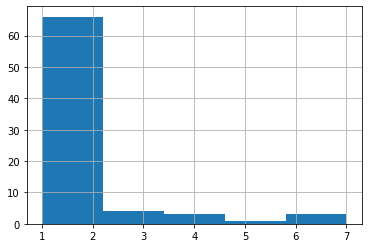

In [8]:
ThreadPerID = pd.value_counts(AllPostID)
ThreadPerID.hist(bins=5)

## Q3: top 10 active users -- based on page 46 to page 50

In [ ]:
Reply = [x[1:] for x in data['allUser']]
AllReply = sum([x for x in Reply],[])

In [11]:
AllReplyID = [x[0][0] for x in AllReply]
AllID = AllReplyID + AllPostID
TopTenActive = Counter(AllID).most_common(10)
TopTenActiveID = []
for ID, times in TopTenActive:
    TopTenActive = [ID, times]
    TopTenActiveID.append(TopTenActive[0])
TopTenActiveID

['24395',
 '10457',
 '11254',
 '11882',
 '12260',
 '1379',
 '5526',
 '11318',
 '10470',
 '5579']

In [12]:
def Extract(list): 
    return [item[0][0] for item in list] 

data['postID'] = AllpostID
data.loc[:,'replyID'] = data.allUser.map(lambda x: Extract(x))

ReplyID = data['replyID']
data['allID'] = data['postID'] + data['replyID']
data

,postuserName,numReplies,postTime,threadTitle,url,allUser,postID,replyID,allID
0,Mandy2608,20,2013-07-18T22:19:36+0100,pet sitting,/forum/threads/pet-sitting.65759/,"[[[26344, 2013-07-18T22:19:36+0100]], [[2658, ...",[26344],"[26344, 2658, 26344, 10687, 26344, 26344, 2634...","[26344, 26344, 2658, 26344, 10687, 26344, 2634..."
1,Lolli_Liability,20,2011-07-06T19:47:29+0100,To those that shouted abuse at me today when i...,/forum/threads/to-those-that-shouted-abuse-at-...,"[[[3376, 2011-07-06T19:47:29+0100]], [[23145, ...",[3376],"[3376, 23145, 3376, 10200, 11254, 3741, 11352,...","[3376, 3376, 23145, 3376, 10200, 11254, 3741, ..."
2,Johndevildog67,20,2014-05-24T08:01:36+0100,work,/forum/threads/work.87011/,"[[[35877, 2014-05-24T08:01:36+0100]], [[35877,...",[35877],"[35877, 35877, 25055, 28295, 35877, 35877, 307...","[35877, 35877, 35877, 25055, 28295, 35877, 358..."
3,calypso,20,2013-03-20T01:22:58+0000,"very high, very low",/forum/threads/very-high-very-low.57315/,"[[[11254, 2013-03-20T01:22:58+0000]], [[24395,...",[11254],"[11254, 24395, 11254, 24395, 21719, 1380, 2439...","[11254, 11254, 24395, 11254, 24395, 21719, 138..."
4,lauli-ann,20,2010-12-26T01:44:35+0000,Question?,/forum/threads/question.18662/,"[[[10676, 2010-12-26T01:44:35+0000]], [[24395,...",[10676],"[10676, 24395, 10457, 10745, 10676, 10745, 106...","[10676, 10676, 24395, 10457, 10745, 10676, 107..."
...,...,...,...,...,...,...,...,...,...
120,happyhappy,19,2008-06-09T18:23:10+0100,Started to stop my meds last night,/forum/threads/started-to-stop-my-meds-last-ni...,"[[[389, 2008-06-09T18:23:10+0100]], [[292, 200...",[389],"[389, 292, 7, 281, 458, 476, 389, 104, 389, 38...","[389, 389, 292, 7, 281, 458, 476, 389, 104, 38..."
121,Desperado,18,2010-08-01T21:40:21+0100,OMG - help! Please not another manic/mixed epi...,/forum/threads/omg-help-please-not-another-man...,"[[[9214, 2010-08-01T21:40:21+0100]], [[5579, 2...",[9214],"[9214, 5579, 9214, 9225, 9214, 5579, 9214, 557...","[9214, 9214, 5579, 9214, 9225, 9214, 5579, 921..."
122,skyblue,18,2012-02-22T10:11:00+0000,Care-Co,/forum/threads/care-co.36610/,"[[[14574, 2012-02-22T12:50:29+0000]], [[14574,...",[14574],"[14574, 14574, 16611, 17940, 17332, 17508, 166...","[14574, 14574, 14574, 16611, 17940, 17332, 175..."
123,Miss Moody,18,2011-01-15T17:24:31+0000,so angry again..................ahhh!!!,/forum/threads/so-angry-again-ahhh.19464/,"[[[10470, 2011-01-15T17:24:31+0000]], [[5518, ...",[10470],"[10470, 5518, 10457, 10470, 10470, 10457, 1047...","[10470, 10470, 5518, 10457, 10470, 10470, 1045..."


In [155]:
for i in range(0,10):
    selection = [TopTenActiveID[i]]
    df = data[pd.DataFrame(data.allID.tolist()).isin(selection).any(1)]
    print('the topic of top',i,'active user:',TopTenActiveID[i],'\n',pd.DataFrame(df['threadTitle']),'\n','\n')

the topic of top 0 active user: 24395 
                                            threadTitle
3                                  very high, very low
4                                            Question?
10                   Quetiapine (Seroquel) Experiences
20                                  Struggling to cope
21                                       Very Very low
27                                     I Love To Sleep
35   How many zoppies can I safely take?  Rough Night.
42   MANIA: The craziest thing I did.  What about y...
49   hello everyone sunday 5th december, how are we...
53                                             goodbye
61                           i dunno who i am any more
64                                     My Cat has died
65                         Bad fall and anxiety attack
70   Free from medication &amp; couldn't be more po...
71                                  Back to the circus
72                                  i just want to die
73                       

## Ｑ2: （b）test power-law distribution -- based on page 46 to page 50

In [80]:
vc1 = pd.DataFrame(data['postID'].value_counts())
vc2 = pd.DataFrame(vc1['postID'].value_counts())
num_Thread = np.array(vc2.index)
num_ID = np.array(vc2['postID'])
lg_numThread = np.log(num_Thread)
lg_numID = np.log(num_ID)
lg_numThread
lg_numID

array([4.02535169, 2.30258509, 1.38629436, 1.09861229, 0.69314718,
       0.        , 0.        ])

In [84]:
model = LinearRegression()
        
x_train = lg_numID[:-2].reshape(-1, 1)
x_test = lg_numID[-2:].reshape(-1, 1)
        
y_train = lg_numThread[:-2].reshape(-1, 1).reshape(-1, 1)
y_test = lg_numThread[-2:].reshape(-1, 1)
        
model.fit(x_train,y_train)
        
y_pred = model.predict(x_test)
        
print('coefficients:',model.coef_,'\n'
      'mean squared error: %.2f' % mean_squared_error(y_test,y_pred),'\n'
                )

coefficients: [[-0.53265356]] 
mean squared error: 0.12 



# Network -- based on page 50

In [21]:
from datetime import datetime

In [22]:
def network1(unique_users):
    G = nx.Graph()
    G.add_edges_from(itertools.combinations(unique_users, 2))
    return G

In [23]:
def network2(H,users):
    weights = []
    for edge in H.edges.data('weight', default=0):
        a = edge[0]
        b = edge[1]
        #print(a,b)
        if a==users[0] or b==users[0]:
                w = 10 
        else:
            w = total_replies(a,users) + total_replies(b,users)
        #H[a][b]['weight'] = w
        if w > 10:
            w = 10
        # new edge. add with weight=1
        H.add_edge(a, b, weight=w)
    #print("The new subgraph is")
    #print(H.edges.data('weight', default=1))
    return H
        
def total_replies(the_user,users):
    number = 0
    for user in users:
        if user == the_user:
            number +=1
            
    return number

In [24]:
G1 = nx.Graph()
G2 = nx.Graph()

for i,thread in enumerate(datalist):
    users = []
    time = []
    #print(thread[-1])
    for item in list(thread[-1]):
        [item] = item
        users.append(item[0])
    unique_users = np.unique(np.array(users))
    # Network 1
    H1 = nx.Graph()
    H1.add_edges_from(itertools.combinations(unique_users, 2))
    G1.add_nodes_from(H1)
    G1.add_edges_from(H1.edges)
    #print(G1.edges.data('weight', default=1))
    #print(H1.edges.data('weight', default=1))
    #H1_edges = H1.edges.data('weight', default=1)
    
    #print(H1_edges)
    # Network 2
    H2 = network2(H1,users)
    #print(H2.edges.data('weight', default=1))
    H2_edges = H2.edges.data('weight', default=0)
    #nx.draw(H2)
    G2.add_nodes_from(H2)
    G2.add_weighted_edges_from(H2_edges)
    #print(G3.edges.data('weight', default=0))
    #print(H3.edges.data('weight', default=1))

for edge in G2.edges.data('weight', default=0):
    a=edge[0]
    b=edge[1]
    if edge[2]!=0:
        # we added this one before, just increase the weight by one
        w = G2[a][b]['weight']
        if w>10:
            G2[a][b]['weight'] = 10

F:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


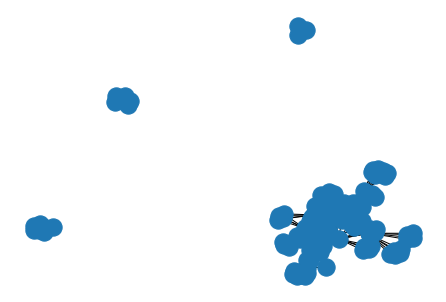

In [25]:
nx.draw(G1)

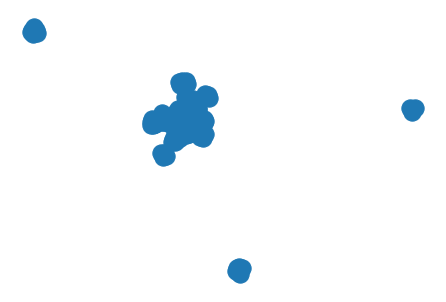

In [32]:
nx.draw(G2)

In [49]:
G2.edges(data=True)

EdgeDataView([('10457', '10676', {'weight': 10}), ('10457', '10701', {'weight': 10}), ('10457', '10941', {'weight': 10}), ('10457', '1379', {'weight': 10}), ('10457', '1503', {'weight': 10}), ('10457', '2058', {'weight': 10}), ('10457', '20720', {'weight': 10}), ('10457', '8449', {'weight': 10}), ('10457', '8591', {'weight': 10}), ('10457', '10910', {'weight': 10}), ('10457', '24395', {'weight': 10}), ('10457', '5579', {'weight': 10}), ('10457', '10200', {'weight': 10}), ('10457', '4570', {'weight': 10}), ('10457', '10194', {'weight': 10}), ('10457', '11318', {'weight': 10}), ('10457', '11685', {'weight': 10}), ('10457', '9000', {'weight': 10}), ('10457', '9233', {'weight': 10}), ('10457', '11254', {'weight': 10}), ('10457', '12260', {'weight': 10}), ('10457', '22460', {'weight': 10}), ('10457', '5526', {'weight': 10}), ('10457', '10613', {'weight': 10}), ('10457', '10662', {'weight': 10}), ('10457', '10745', {'weight': 10}), ('10457', '10953', {'weight': 10}), ('10457', '2792', {'weig

In [50]:
G3.edges(data=True)

EdgeDataView([('10457', '10676', {'weight': 10}), ('10457', '10701', {'weight': 8}), ('10457', '10941', {'weight': 10}), ('10457', '1379', {'weight': 10}), ('10457', '1503', {'weight': 10}), ('10457', '2058', {'weight': 10}), ('10457', '20720', {'weight': 10}), ('10457', '8449', {'weight': 9}), ('10457', '8591', {'weight': 10}), ('10457', '10910', {'weight': 8}), ('10457', '24395', {'weight': 9}), ('10457', '5579', {'weight': 9}), ('10457', '10200', {'weight': 9}), ('10457', '4570', {'weight': 10}), ('10457', '10194', {'weight': 9}), ('10457', '11318', {'weight': 10}), ('10457', '11685', {'weight': 10}), ('10457', '9000', {'weight': 10}), ('10457', '9233', {'weight': 10}), ('10457', '11254', {'weight': 10}), ('10457', '12260', {'weight': 7}), ('10457', '22460', {'weight': 6}), ('10457', '5526', {'weight': 6}), ('10457', '10613', {'weight': 7}), ('10457', '10662', {'weight': 8}), ('10457', '10745', {'weight': 8}), ('10457', '10953', {'weight': 10}), ('10457', '2792', {'weight': 8}), ('1

In [33]:
A1 = nx.adjacency_matrix(G1)
A2 = nx.adjacency_matrix(G2)

In [35]:
print(A1.todense())

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [36]:
print(A2.todense())

[[ 0 10 10 ...  0  0  0]
 [10  0 10 ...  0  0  0]
 [10 10  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0 10 10]
 [ 0  0  0 ... 10  0 10]
 [ 0  0  0 ... 10 10  0]]


In [52]:
A3 = nx.adjacency_matrix(G2)
print(A3.todense())

[[ 0 10 10 ...  0  0  0]
 [10  0 10 ...  0  0  0]
 [10 10  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0 10 10]
 [ 0  0  0 ... 10  0 10]
 [ 0  0  0 ... 10 10  0]]


In [37]:
G1 = nx.Graph()
G3 = nx.Graph()

for i,thread in enumerate(datalist):
    users = []
    time = []
    #print(thread[-1])
    for item in list(thread[-1]):
        [item] = item
        users.append(item[0])
        time.append(item[1])
    unique_users = np.unique(np.array(users))
    dt_time = []
    for ti in time:
        dt_time.append(datetime.strptime(ti, "%Y-%m-%dT%H:%M:%S%z"))
    # Network 1
    H1 = nx.Graph()
    H1.add_edges_from(itertools.combinations(unique_users, 2))
    G1.add_nodes_from(H1)
    G1.add_edges_from(H1.edges)
    #print(G1.edges.data('weight', default=1))
    #print(H1.edges.data('weight', default=1))
    #H1_edges = H1.edges.data('weight', default=1)
    
    # Network 3
    H3 = network3(H1,dt_time,users)
    print(H3.edges.data('weight', default=0))
    G3.add_weighted_edges_from(H3.edges.data('weight', default=0))

[('10457', '10676', 10), ('10457', '10701', 10), ('10457', '10941', 10), ('10457', '1379', 10), ('10457', '1503', 10), ('10457', '2058', 10), ('10457', '20720', 10), ('10457', '8449', 10), ('10457', '8591', 10), ('10676', '10701', 7), ('10676', '10941', 8), ('10676', '1379', 7), ('10676', '1503', 8), ('10676', '2058', 8), ('10676', '20720', 8), ('10676', '8449', 8), ('10676', '8591', 6), ('10701', '10941', 9), ('10701', '1379', 8), ('10701', '1503', 9), ('10701', '2058', 9), ('10701', '20720', 9), ('10701', '8449', 9), ('10701', '8591', 6), ('10941', '1379', 9), ('10941', '1503', 10), ('10941', '2058', 10), ('10941', '20720', 10), ('10941', '8449', 10), ('10941', '8591', 7), ('1379', '1503', 9), ('1379', '2058', 9), ('1379', '20720', 9), ('1379', '8449', 9), ('1379', '8591', 6), ('1503', '2058', 10), ('1503', '20720', 10), ('1503', '8449', 10), ('1503', '8591', 7), ('2058', '20720', 10), ('2058', '8449', 10), ('2058', '8591', 7), ('20720', '8449', 10), ('20720', '8591', 7), ('8449', '8

F:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


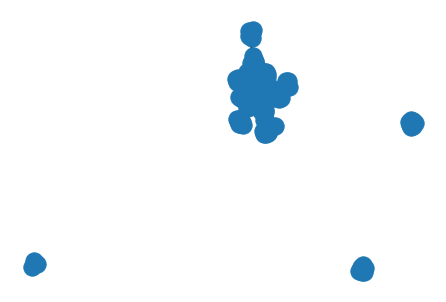

In [38]:
nx.draw(G3)

## Attributes of the constructed graph

In [27]:
def AttributesOfGraph(G,weights):
    # (1) number of nodes
    num_nodes = G.number_of_nodes()
    
    # (2) number of edges
    num_edges = G.number_of_edges()
    
    # (3) overall clustering coefficient
    ave_cluster = nx.average_clustering(G,weight=weights) 
    overall_cluster = ave_cluster * num_nodes
    
    # (4) average path length
    connected_component = sorted(nx.connected_component_subgraphs(G),key=len,reverse=True)
    all_path_length = 0
    for i in range(0,len(connected_component)):
        nodes_num_component = connected_component[i].number_of_nodes()
        path_length = (nx.average_shortest_path_length(connected_component[i],weight=weights))* nodes_num_component
        all_path_length += path_length
    ave_path_length = all_path_length / G.number_of_nodes()
    
    # (5) size of giant component
    max_component = max(nx.connected_component_subgraphs(G),key=len)
    size_max_component = max_component.size(weight=weights)
    
    # (6) diameter
    diameter = nx.diameter(max_component)
    
    # (7) maximum degree
    degree_sequence = sorted([d for n,d in G.degree()], reverse=True)
    max_degree = max(degree_sequence)
    
    # (8) average degree
    all_degree = sum([degree for (node,degree) in G.degree()])
    ave_degree = all_degree / num_nodes 
        
    # (9) number of communities      #  to get the first k tuples of communities:
    communities = community.girvan_newman(G)
    k = 10
    for commu in itertools.islice(communities, k):
        k_communities = tuple(sorted(c) for c in commu)
    size_communities = np.shape(k_communities)
    #sorted([c] for c in next(communities))
    num_communities = size_communities[0]
    
    # (10) quality performance

    
    print('number of nodes:', num_nodes,'\n'
          'number of edges:', num_edges,'\n'
          'overall clustering coefficient:', overall_cluster,'\n'
          'average path length:', ave_path_length,'\n'
          'size of giant component:', size_max_component,'\n'
          'diameter:', diameter,'\n'
          'maximum degree:', max_degree,'\n'
          'average degree:', ave_degree,'\n'
          'number of communities:', num_communities,'\n'
          )

In [28]:
AttributesOfGraph(G1,None)

number of nodes: 124 
number of edges: 616 
overall clustering coefficient: 110.74253507001303 
average path length: 2.4481459149834186 
size of giant component: 577 
diameter: 5 
maximum degree: 44 
average degree: 9.935483870967742 
number of communities: 14 



In [29]:
AttributesOfGraph(G2,'weight')

number of nodes: 124 
number of edges: 616 
overall clustering coefficient: 93.39985365709956 
average path length: 20.21416943020802 
size of giant component: 4856.0 
diameter: 5 
maximum degree: 44 
average degree: 9.935483870967742 
number of communities: 14 



In [39]:
AttributesOfGraph(G3,'weight')

number of nodes: 124 
number of edges: 616 
overall clustering coefficient: 100.71120797771354 
average path length: 21.68591096372224 
size of giant component: 5307.0 
diameter: 5 
maximum degree: 44 
average degree: 9.935483870967742 
number of communities: 14 



## centrality values

In [40]:
def Centrality(G,weights):
    # (1) nodes with highest degree centrality:
    degree_sequence = nx.degree_centrality(G)
    #sorted([d for n,d in nx.degree_centrality(G)], reverse=True)
    degree_value = max(degree_sequence.items(),key=operator.itemgetter(1))[1]
    degree_nodes = []
    
    for node,value in degree_sequence.items():
        if (value == max(degree_sequence.values())):
            degree_nodes.append(node)
    
    
    # (2) nodes with highest in-betweenness centrality:
    betweenness_sequence = nx.betweenness_centrality(G,weight=weights)
    betweenness_value = max(betweenness_sequence.items(),key=operator.itemgetter(1))[1]
    betweenness_nodes = []

    for node,value in betweenness_sequence.items():
        if (value == max(betweenness_sequence.values())):
            betweenness_nodes.append(node)
    
    
    # (3) nodes with highest closeness centrality:
    closeness_sequence = nx.closeness_centrality(G)
    closeness_value = max(closeness_sequence.items(),key=operator.itemgetter(1))[1]
    closeness_nodes = []
    
    for node,value in closeness_sequence.items():
        if (value == max(closeness_sequence.values())):
            closeness_nodes.append(node)
    
    print(
          'degree centrality:','\n','nodes:',degree_nodes,'\n','value:',degree_value,'\n','\n'
          'in-betweenness centrality:','\n','nodes:',betweenness_nodes,'\n','value:',betweenness_value,'\n','\n'
          'closeness centrality:','\n','nodes:',closeness_nodes,'\n','value:',closeness_value,'\n'
         )

In [44]:
Centrality(G1,None)

degree centrality: 
 nodes: ['10457'] 
 value: 0.3577235772357724 
 
in-betweenness centrality: 
 nodes: ['10457'] 
 value: 0.17525454502339216 
 
closeness centrality: 
 nodes: ['10457'] 
 value: 0.49511330219685173 



In [45]:
Centrality(G2,'weight')

degree centrality: 
 nodes: ['10457'] 
 value: 0.3577235772357724 
 
in-betweenness centrality: 
 nodes: ['57702'] 
 value: 0.17147014210188952 
 
closeness centrality: 
 nodes: ['10457'] 
 value: 0.49511330219685173 



In [41]:
Centrality(G3,'weight')

degree centrality: 
 nodes: ['10457'] 
 value: 0.3577235772357724 
 
in-betweenness centrality: 
 nodes: ['10457'] 
 value: 0.2780654404904708 
 
closeness centrality: 
 nodes: ['10457'] 
 value: 0.49511330219685173 



## PageRank

In [42]:
def PageRank(G,weights):
    pg_sequence = nx.pagerank(G,weight=weights)
    pg_value = max(pg_sequence.items(),key=operator.itemgetter(1))[1]
    pg_nodes = []

    for node,value in pg_sequence.items():
        if (value == max(pg_sequence.values())):
            pg_nodes.append(node)
    
    print('PageRank centrality:', '\n',
          'nodes:',pg_nodes,'\n',
          'value:',pg_value)

In [43]:
PageRank(G3,'weight')

PageRank centrality: 
 nodes: ['10457'] 
 value: 0.026299549007499645


In [46]:
PageRank(G1,'weight')

PageRank centrality: 
 nodes: ['10457'] 
 value: 0.027669864365471142


In [47]:
PageRank(G2,'weight')

PageRank centrality: 
 nodes: ['10457'] 
 value: 0.03256727729370203
